In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pystan

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
o_age = df['age']
age_mean = df['age'].mean()              #age and mean of age we need for model

In [ ]:
sample_code = """
data {
  int <lower=1> T;
  vector[T] h;        
  vector[T] a;              
  real a_bar; 
}
parameters {
  real alpha;
  real beta;
  real sigma;
}
model {
  vector[T] mu;
  alpha ~ normal(178,20);    //prior
  beta ~ normal(0,10);       //prior
  sigma ~ uniform(0,50);
  for(i in 1:T){
    mu[i] = alpha + beta * (a[i]-a_bar);   // linear model to predict mu values
  }
  h ~ normal(mu,sigma);                //likelihood
}
"""

In [ ]:
people_data = { "T":544,
                "h": list(df['height']),              #assign_data
                "a_bar": df['age'].mean(),
                "a": list(df['age'])}

sm = pystan.StanModel(model_code=sample_code)                      #fit model
fit = sm.sampling(data=people_data, iter=1000, chains=4, seed=1)          

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0f9b892cdc05739ee16ea0c4c1fcb0b8 NOW.


In [ ]:
type(fit)

stanfit4anon_model_0f9b892cdc05739ee16ea0c4c1fcb0b8_787937575010632728.StanFit4Model

In [ ]:
summary_dict = fit.summary()                                 #extract data
df_new = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

alpha_mean, beta_mean = df_new['mean']['alpha'], df_new['mean']['beta']
alpha = fit['alpha']
beta = fit['beta']
len(beta)

2000

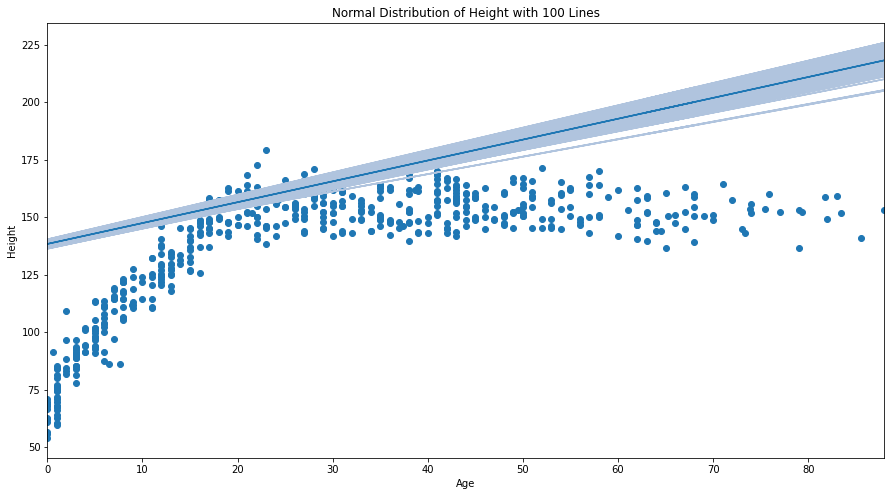

In [ ]:
age_plot = np.array(df['age'])                       #plotting data
x_min = min(age_plot)
x_max = max(age_plot)

plt.figure(figsize=(15,8))

for i in range(100):
    alpha_p, beta_p = alpha[i], beta[i]
    plt.plot(age_plot, alpha_p + beta_p * age_plot, color='lightsteelblue')

plt.plot(age_plot, alpha_mean + beta_mean * age_plot)                  #actual mu and predicted mu   

plt.scatter(df['age'], df['height'])                               #plotting height w.r.t age
plt.xlabel('Age')
plt.ylabel('Height')

plt.title('Normal Distribution of Height with 100 Lines')
plt.xlim(x_min, x_max)
plt.show()

Que 3. 

In [ ]:
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


pytan model

In [ ]:
sample_code1 = """
data {
  int <lower=1> T;
  vector[T] a1;        
  vector[T] a2;              
  vector[T] h; 
}
parameters {
  real alpha;
  real beta1;
  real beta2;
  real sigma;
}
model {
  for(i in 1:T)
    h[i] ~ normal(alpha + beta1 * a1[i] + beta2 * a2[i],sigma);
}
"""

In [ ]:
people_data1 = { "T":544,
                "h": list(df['height']),
                "a1": list(df['age']),
                "a2": list(df['age']**2)}

sm = pystan.StanModel(model_code=sample_code1)
fit1 = sm.sampling(data=people_data1, iter=1000, chains=4, seed=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_109fb5447fe7c4488b01bce82d05a4ef NOW.


In [ ]:
summary_dict = fit1.summary()
dfNew = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

alpha_mean, beta1_mean, beta2_mean = dfNew['mean']['alpha'], dfNew['mean']['beta1'], dfNew['mean']['beta2']
alpha = fit1['alpha']
beta1 = fit1['beta1']
beta2 = fit1['beta2']

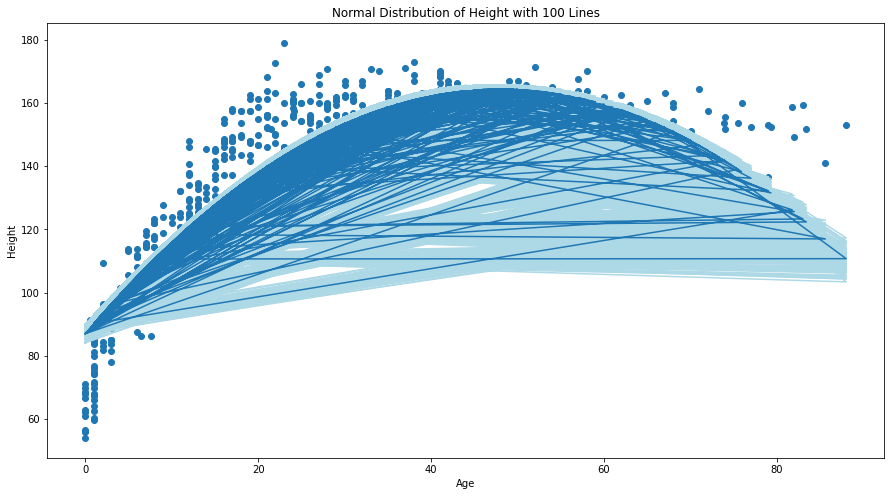

In [ ]:
age_plot = df['age']
plt.figure(figsize=(15,8))

for i in range(100):
    alpha_p, beta_1, beta_2 = alpha[i], beta1[i], beta2[i]
    plt.plot(age_plot, alpha_p + beta_1 * age_plot + beta_2 * (age_plot)**2, color = 'lightblue')
 
plt.plot(age_plot, alpha_p + beta_1 * age_plot + beta_2 * (age_plot)**2)
plt.scatter(df['age'], df['height'])
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Normal Distribution of Height with 100 Lines')
plt.savefig('graph1.png', bbox_inches='tight')
plt.show()   

In [3]:
df= pd.read_csv('data.csv')
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [ ]:
general = """
data {
  int <lower=1> T;
  vector[T] h;        
  vector[T] a;              
  real a_bar; 
}
parameters {
  real alpha;
  real beta;
  real sigma;
}
model {
  vector[T] mu;
  alpha ~ normal(178,20);
  beta ~ normal(0,10);
  sigma ~ uniform(0,50);
  for(i in 1:T){
    mu[i] = alpha + beta * (a[i]-a_bar);
  }
  h ~ normal(mu,sigma);
}
"""

In [1]:
sample_code= """
data{
  int<lower=1> N;
  vector[N] a;
  vector[N] h;
  real a_mean;

}
parameters{
  real alpha;
  real beta;
  real sigma;
}
model{
  vector[N] mu;
  alpha ~ normal(178,20);
  beta ~ normal(0,10);
  sigma ~ uniform(0,50);
  for(i in 1:N){
    mu[i]= alpha+beta*(a[i]- a_mean);
  }
  h~ normal(mu, sigma);
}
"""

In [2]:
a = { "N":544,
                "h": list(df['height']),
                "a_mean": df['age'].mean(),
                "a": list(df['age'])}

sm = pystan.StanModel(model_code=sample_code)
model = sm.sampling(data=a, iter=1000, chains=4, seed=1)

NameError: ignored